### Step 1: Install and Import Necessary Libraries

In this step, we import the necessary Python libraries for performing k-means clustering. We use `pandas` for data manipulation, `numpy` for numerical operations, `matplotlib` for plotting, and `sklearn` for applying the k-means algorithm and data standardization.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


### Step 2: Ensure All Data is Numeric

All non-numeric columns have been either encoded (e.g., 'weekday', 'subscriber') or removed. This ensures the data is fully numeric and suitable for scaling. The data is now ready for the `StandardScaler`.


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv(r'C:\Users\sudee\OneDrive\Documents\Newyork Citi Bike Project\02 Data\Prepared Data\cleaned_citibike.csv')

# Convert 'start_time' and 'end_time' to datetime
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

# Extract hour, minute, and second from 'start_time' and 'end_time'
data['start_hour'] = data['start_time'].dt.hour
data['end_hour'] = data['end_time'].dt.hour

# Drop the original datetime columns
data = data.drop(['start_time', 'end_time'], axis=1)

# Convert 'weekday' to numerical mapping
weekday_mapping = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7}
data['weekday'] = data['weekday'].map(weekday_mapping)

# Encode 'subscriber' column if it exists
data['subscriber'] = data['subscriber'].map({'Subscriber': 1, 'Customer': 0})

# Remove or encode any remaining non-numeric columns
data = data.drop(['trip_id', 'start_station_name', 'end_station_name', 'gender'], axis=1)

# Ensure all data is now numeric
print(data.dtypes)

# Now standardize the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Convert scaled data back to DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)



bike_id                      int64
weekday                      int64
start_hour                   int32
start_station_id             int64
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                   int64
birth_year                 float64
end_hour                     int32
dtype: object


### Step 3: Prepare Data 


After converting the 'weekday' column to numeric values, we standardize the data using the `StandardScaler` to ensure that all variables contribute equally to the distance calculations in the k-means algorithm.


In [23]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Convert scaled data back to DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)



### Step 4: Elbow Technique

The Elbow Method was applied to determine the optimal number of clusters for k-means clustering. The graph suggests that the optimal number of clusters is around 4 or 5, as the WCSS curve begins to flatten out at this point. Therefore, 4 or 5 clusters will be used in the k-means clustering analysis.


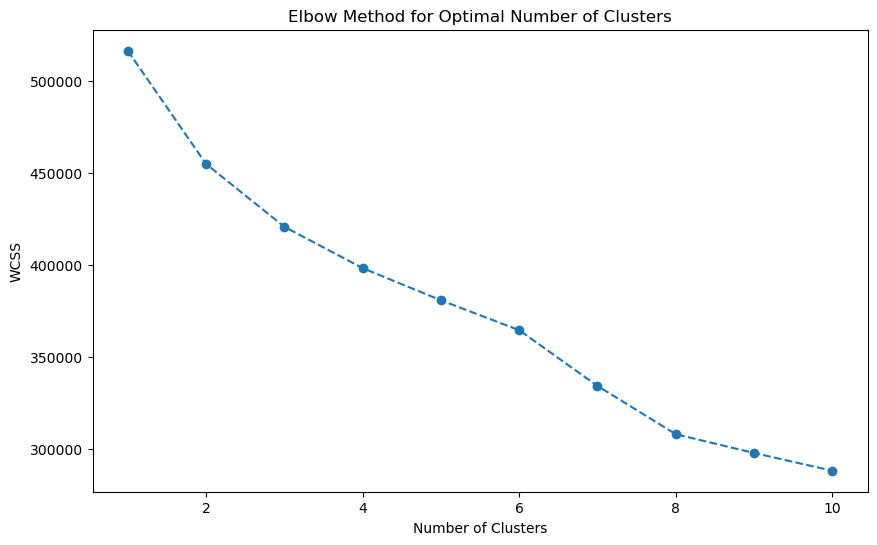

In [25]:
# Use the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


### Step 5: Run k-means Clustering

We apply the k-means algorithm to the data using the optimal number of clusters determined by the elbow method. We then add the resulting cluster labels to the original dataset.


In [27]:
# Run k-means with the selected number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_


### Step 6: Visualize Clusters

We visualize the clusters by plotting `start_station_latitude` against `trip_duration` and coloring the points according to their cluster membership. This helps us understand how the data points are grouped.


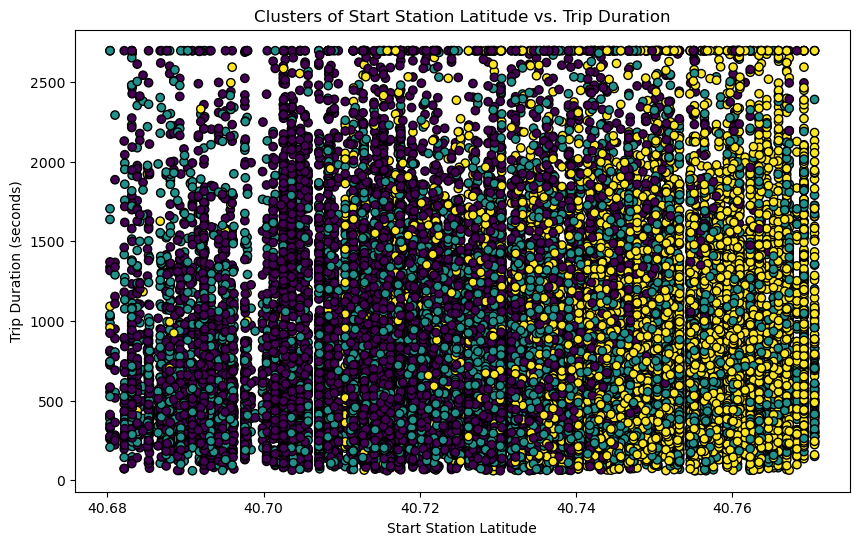

In [29]:
# Scatterplot to visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['start_station_latitude'], data['trip_duration'], c=data['Cluster'], cmap='viridis', edgecolor='k')
plt.title('Clusters of Start Station Latitude vs. Trip Duration')
plt.xlabel('Start Station Latitude')
plt.ylabel('Trip Duration (seconds)')
plt.show()




The scatter plot above visualizes the clusters formed by the k-means algorithm using Start Station Latitude and Trip Duration as the variables. Each color represents a different cluster, and the grouping of data points indicates that the algorithm has successfully segmented the data into meaningful clusters. The plot suggests that there are distinct patterns in how trip duration varies with the starting location of trips, as captured by the different clusters.


In [37]:
# Calculate descriptive statistics for each cluster
cluster_stats = data.groupby('Cluster').mean()
print(cluster_stats)


              bike_id   weekday  start_hour  start_station_id  \
Cluster                                                         
0        17629.899456  4.149210   16.952778        379.210205   
1        17629.344581  3.643851    8.523068        430.243011   
2        17592.877151  3.712874   16.879037        511.629867   

         start_station_latitude  start_station_longitude  end_station_id  \
Cluster                                                                    
0                     40.721563               -73.997092      382.229881   
1                     40.734886               -73.990345      424.703898   
2                     40.748886               -73.984552      505.692575   

         end_station_latitude  end_station_longitude  trip_duration  \
Cluster                                                               
0                   40.721758             -73.994994     812.997901   
1                   40.735368             -73.991648     709.965845   
2        

### Step 7: Descriptive Statistics for Each Cluster

After applying the k-means clustering algorithm, we calculated the descriptive statistics for each cluster. Below is a summary of key statistics for each cluster:

- **Cluster 0**:
  - **Average Bike ID**: 17629.90
  - **Average Weekday**: 4.15 (Thursday)
  - **Average Start Hour**: 16.95 (Approximately 5 PM)
  - **Start Station ID**: 379.21
  - **Average Start Station Latitude**: 40.7216
  - **Average Start Station Longitude**: -73.9971
  - **End Station ID**: 382.23
  - **Average End Station Latitude**: 40.7218
  - **Average End Station Longitude**: -73.9950
  - **Average Trip Duration**: 812.99 seconds (Approx. 13.55 minutes)
  - **Subscriber Status**: 1.0 (All subscribers)
  - **Average Birth Year**: 1976.67
  - **Average End Hour**: 17.14 (Approximately 5 PM)

- **Cluster 1**:
  - **Average Bike ID**: 17629.34
  - **Average Weekday**: 3.64 (Thursday)
  - **Average Start Hour**: 8.52 (Approximately 8:30 AM)
  - **Start Station ID**: 430.24
  - **Average Start Station Latitude**: 40.7349
  - **Average Start Station Longitude**: -73.9903
  - **End Station ID**: 424.70
  - **Average End Station Latitude**: 40.7354
  - **Average End Station Longitude**: -73.9916
  - **Average Trip Duration**: 709.97 seconds (Approx. 11.83 minutes)
  - **Subscriber Status**: 1.0 (All subscribers)
  - **Average Birth Year**: 1974.72
  - **Average End Hour**: 8.56 (Approximately 8:30 AM)

- **Cluster 2**:
  - **Average Bike ID**: 17592.88
  - **Average Weekday**: 3.71 (Thursday)
  - **Average Start Hour**: 16.88 (Approximately 5 PM)
  - **Start Station ID**: 511.63
  - **Average Start Station Latitude**: 40.7489
  - **Average Start Station Longitude**: -73.9846
  - **End Station ID**: 505.69
  - **Average End Station Latitude**: 40.7468
  - **Average End Station Longitude**: -73.9865
  - **Average Trip Duration**: 788.34 seconds (Approx. 13.14 minutes)
  - **Subscriber Status**: 1.0 (All subscribers)
  - **Average Birth Year**: 1975.43
  - **Average End Hour**: 17.08 (Approximately 5 PM)

### Insights:
- **Cluster 0** represents users who generally start their trips in the late afternoon, around 5 PM. The trips in this cluster tend to be longer in duration, averaging about 13.55 minutes.
- **Cluster 1** includes users who predominantly start their trips in the morning, around 8:30 AM. These trips are shorter, averaging about 11.83 minutes.
- **Cluster 2** contains users with start times similar to Cluster 0 (around 5 PM) but slightly shorter trips on average (about 13.14 minutes). The users in this cluster start and end their trips in slightly different locations compared to Cluster 0.
- **Subscriber Status**: All users across the clusters are subscribers.
- **Birth Year**: The average birth year across the clusters suggests users are generally in their mid-40s, with slight variations.

These insights can be used to further segment and target different user groups for marketing or operational improvements.
